## Clustering Account IDs based on Loan Amount and Balance

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Master_Table_Updated_new.csv")

In [3]:
df.head()

card_id  disp_id     type           issued  account_id  \
0      159      946  classic  950501 00:00:00         790   
1      159      946  classic  950501 00:00:00         790   
2      159      946  classic  950501 00:00:00         790   
3      159      946  classic  950501 00:00:00         790   
4      159      946  classic  950501 00:00:00         790   

   disposition_client_id disposition_type  client_id  birth_number  \
0                    946            OWNER        946        510806   
1                    946            OWNER        946        510806   
2                    946            OWNER        946        510806   
3                    946            OWNER        946        510806   
4                    946            OWNER        946        510806   

   district_id  ...  balance k_symbol.1 bank  account  loan_id  loan_date  \
0           54  ...    300.0        NaN  NaN      NaN     5126     940724   
1           54  ...   9900.0        NaN  NaN      NaN     5126     940724   
2           54  ...  42599.0        NaN  NaN      NaN     5126     940724   
3           54  ...  42658.2       UROK  NaN      NaN     5126     940724   
4           54  ...  48117.2        NaN  NaN      NaN     5126     940724   

   loan_amount  duration  payments  status  
0       208128        48      4336       B  
1       208128        48      4336       B  
2       208128        48      4336       B  
3       208128        48      4336       B  
4       208128        48      4336       B  

[5 rows x 50 columns]

In [4]:
df.columns

Index(['card_id', 'disp_id', 'type', 'issued', 'account_id',
       'disposition_client_id', 'disposition_type', 'client_id',
       'birth_number', 'district_id', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'order_id',
       'bank_to', 'account_to', 'amount', 'k_symbol', 'account_date',
       'account_district_id', 'frequency', 'trans_id', 'account_id.1', 'date',
       'type.1', 'operation', 'amount.1', 'balance', 'k_symbol.1', 'bank',
       'account', 'loan_id', 'loan_date', 'loan_amount', 'duration',
       'payments', 'status'],
      dtype='object')

In [5]:
x=df[['loan_amount','balance']]

In [6]:
x.head()

loan_amount  balance
0       208128    300.0
1       208128   9900.0
2       208128  42599.0
3       208128  42658.2
4       208128  48117.2

In [7]:
from sklearn.cluster import KMeans

In [8]:
km=KMeans(n_clusters=5)

In [9]:
mod=km.fit(x)

In [10]:
pred=mod.predict(x)

In [11]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4,
       0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0,
       1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
x.insert(0,'Account_id',df['account_id'])

In [13]:
x['Cluster']=pred

<ipython-input-13-dcf220ab3d60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster']=pred


In [14]:
import seaborn as sns

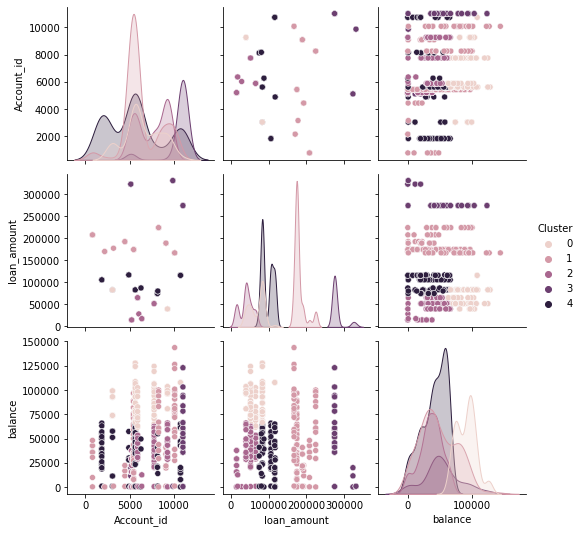

In [15]:
sns.pairplot(x,hue='Cluster')

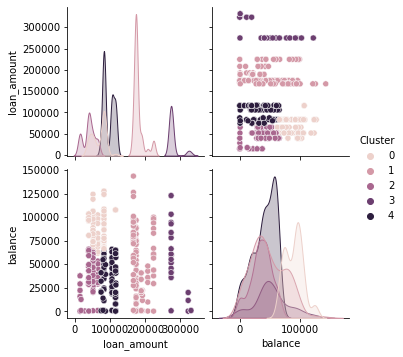

In [16]:
sns.pairplot(x,hue='Cluster',vars=['loan_amount','balance'])

### Accuracy Score For Clustering

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(x,km.labels_)*100#here the accuracy is below 50% should change the no of clusters

48.66802562421624

### Finding number of clusters using Elbow Method

In [19]:
wcss=[]
wcss2=[]
for i in range(1,15):
    k1=KMeans(n_clusters=i)
    m1=k1.fit(x)
    wcss.append(k1.inertia_)
    wcss2.append(m1.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
wcss

[5472461107746.017,
 1867586814288.101,
 1227840069298.5293,
 904275947887.5836,
 659135707200.3839,
 519005527657.8987,
 439823943978.47687,
 390785151960.84045,
 351619742804.16,
 306327165643.2238,
 271349594938.1249,
 238940616299.2569,
 216964940839.4558,
 185220839122.1187]

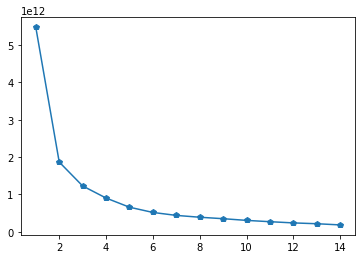

In [22]:
plt.plot(range(1,15),wcss,'p-')

##### from above figure we can see the curve has sharp cutting at k=2.hence clusters should be 2

In [23]:
xx=x[['loan_amount','balance']]

In [24]:
xx

loan_amount  balance
0         208128    300.0
1         208128   9900.0
2         208128  42599.0
3         208128  42658.2
4         208128  48117.2
..           ...      ...
863       274740  55159.1
864       274740  83659.1
865       274740  45660.1
866       274740  40960.1
867       274740  41112.9

[868 rows x 2 columns]

In [25]:
k2=KMeans(n_clusters=2)

In [26]:
m2=k2.fit(xx)

In [27]:
clusters=m2.predict(xx)

In [28]:
silhouette_score(xx,k2.labels_)*100#here we're getting accuracy above 50% which is a good score for clustering

58.6125158744068

In [29]:
DS_clustered=xx
DS_clustered

loan_amount  balance
0         208128    300.0
1         208128   9900.0
2         208128  42599.0
3         208128  42658.2
4         208128  48117.2
..           ...      ...
863       274740  55159.1
864       274740  83659.1
865       274740  45660.1
866       274740  40960.1
867       274740  41112.9

[868 rows x 2 columns]

In [30]:
DS_clustered.insert(0,"Account_id",df['account_id'])
DS_clustered.head()

Account_id  loan_amount  balance
0         790       208128    300.0
1         790       208128   9900.0
2         790       208128  42599.0
3         790       208128  42658.2
4         790       208128  48117.2

In [31]:
DS_clustered['Cluster']=clusters
DS_clustered.head()

Account_id  loan_amount  balance  Cluster
0         790       208128    300.0        1
1         790       208128   9900.0        1
2         790       208128  42599.0        1
3         790       208128  42658.2        1
4         790       208128  48117.2        1

In [32]:
sns.pairplot(DS_clustered,hue='Cluster',vars=['loan_amount','balance'])

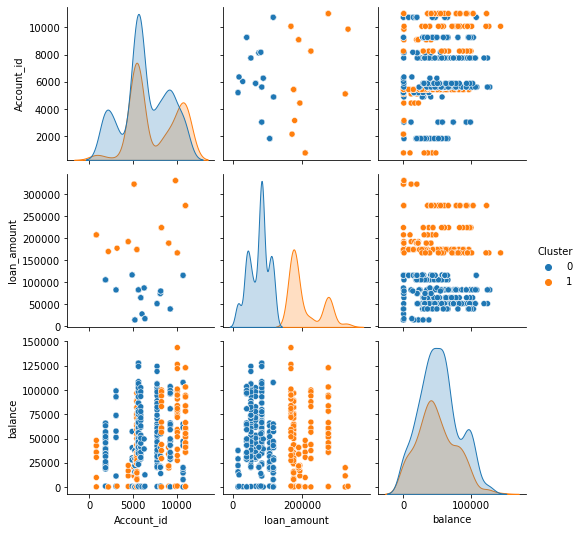

In [33]:
sns.pairplot(DS_clustered,hue='Cluster')

#### Final Datset with clustering will be given as

In [34]:
DS_clustered.head(20)

Account_id  loan_amount  balance  Cluster
0          790       208128    300.0        1
1          790       208128   9900.0        1
2          790       208128  42599.0        1
3          790       208128  42658.2        1
4          790       208128  48117.2        1
5          790       208128  35817.2        1
6          790       208128  35974.6        1
7          790       208128  30674.6        1
8         1843       105804   1000.0        0
9         1843       105804  18632.0        0
10        1843       105804  22532.0        0
11        1843       105804  40164.0        0
12        1843       105804  40297.8        0
13        1843       105804  31697.8        0
14        1843       105804  49329.8        0
15        1843       105804  49462.7        0
16        1843       105804  37262.7        0
17        1843       105804  54894.7        0
18        1843       105804  39294.7        0
19        1843       105804  39450.5        0

In [35]:
#Account IDs fall under Cluster one

c1=list(DS_clustered[DS_clustered['Cluster']==1].Account_id.unique())
c1

[790, 2167, 3166, 4448, 5120, 5442, 8260, 9093, 9869, 10079, 11013]

In [36]:
#Account IDs fall under Cluster zero

c0=list(DS_clustered[DS_clustered['Cluster']==0].Account_id.unique())
c0

[1843,
 3050,
 4894,
 5215,
 5622,
 5891,
 6030,
 6273,
 6363,
 7753,
 8129,
 8173,
 9265,
 10738]

In [43]:
#     Clustered_DS=
Clustered_DS=pd.concat([df,DS_clustered['Cluster']],axis=1)

In [45]:
Clustered_DS.to_excel('Clustered_Dataset.xlsx')


### hierarchical clustering

In [52]:
x_hc=df[['loan_amount','balance']]
x_hc.head()

loan_amount  balance
0       208128    300.0
1       208128   9900.0
2       208128  42599.0
3       208128  42658.2
4       208128  48117.2

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
AC=AgglomerativeClustering(n_clusters=2)

In [53]:
md=AC.fit_predict(x_hc)

In [54]:
silhouette_score(x_hc,AC.labels_)

0.586125158744068

In [55]:
import scipy.cluster.hierarchy as sch

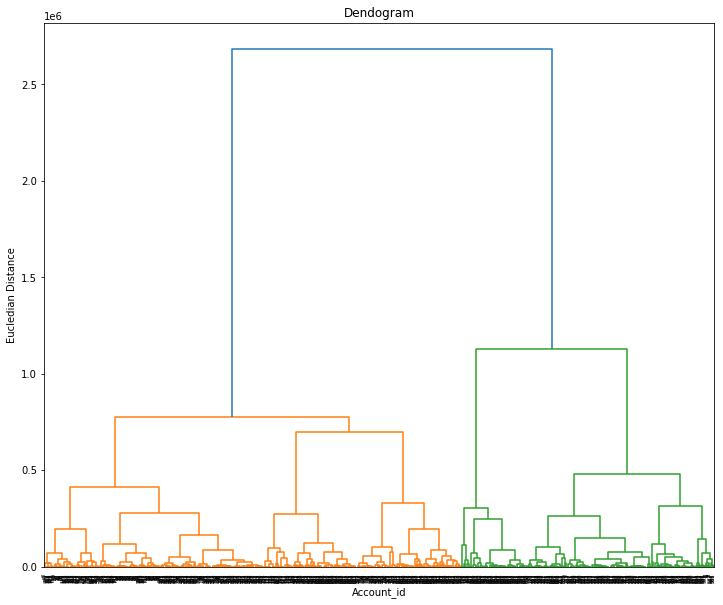

In [57]:
plt.figure(figsize=(12,10))
dendogram=sch.dendrogram(sch.linkage(x_hc,method='ward'))
plt.title("Dendogram")
plt.xlabel("Account_id")
plt.ylabel("Eucledian Distance")
plt.show()